In [ ]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

<div class="namebox">    
Double Click to edit and enter your

1.  Name
2.  Student ID
3.  @ucsd.edu email address
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">
Assignment 5: Exploiting the parallelism in modern computers
</div>

In this assignment, you'll learn about the concepts of:

1. Thread-level parallelism
2. Multi-threading programming

You are strongly encouraged to go through the following documents before starting.
1.  The x86-64 assembly http://www.cs.cmu.edu/~fp/courses/15213-s06/misc/asm64-handout.pdf
2.  Intel Sky Lake CPU Architectures https://ieeexplore.ieee.org/document/7924286
This assignment includes a programming assignment. 

Check the course schedule for due date(s).

We need to thank [Dr. Steven Swanson](https://cseweb.ucsd.edu/~swanson/) as a significant part of the assignment is orginated from Dr. Swanson's teaching materials.

# FAQ and Updates

* There are no updates, yet.

## Keeping Your Assignment Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza when an update is avaiassignmentle.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  **Save your notebook in the browser first**.


```
cd <your directory for this assignment>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new assignment. It will fail 
                                              # harmlessly if you run it more than once.
cp Assignment.ipynb Assignment.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

```
./fix-repo
./pull-updates
```


Be sure to save your current progress!!!

Then run this cell. It'll fix your git repo history so you can successfully merge in updates

In [ ]:
!./fix-repo
!./pull-updates

Then, reload this page in your browser.

## How To Use This Document

You will use Jupyter Notebook to complete this assignment.  You should be able to do much of this assignment without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

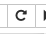


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

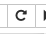

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

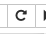

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

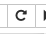

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get something like `failed: no such file or directory`, please make sure you executed all cells before the current one.
2.  Sometimes `cse142 run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) and restart the kernel seems to jolt it awake and cause it to continue.
3. If you get errors similar to `NameError: name 'render_csv' is not defined` or something similar, please re-execute the very beginning cell of this document.

### The Embedded Code

The code embedded in the assignment falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the assignment will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-danger">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

## Grading

### CSE142
If you are taking CSE142, you will need to submit the CSE142&CSE142L questions before each CSE142 assignment deadline. These questions will be graded based on correctness.

### CSE142L
Your grade for this lab report will be based on your completion and submission of this notebook.


Check Gradescope for the due dates.

### Submissions

Instructions for submitting the assignment/lab are at the end of the assignment/lab.

No late work or extensions will be allowed.

Since Alder Lake is an x86 processor, you're strongly encourage to review x86 assembly before starting the rest of the assignment. You may find [this link](https://www.cs.virginia.edu/~evans/cs216/guides/x86.html) useful 

# Thread-level parallelism in modern processors

ILP and MLP exist within a single core, and the degree of parallelism is limited by the number of instructions the CPU can issue per cycle. To get more parallelism, we need to use more CPUs, and for that we'll need to create threads.

A thread is a flow of control through your program that runs on a processor. Every program has at least one thread, and by creating multiple threads you can spread the work of your program across many cores, hopefully improving it's performance.

Making programs fast via multi-threading is an extremely deep and complex area. We could easily spend an entire quarter studying techniques for creating, managing, and using threads, and most universities (including UCSD) offer several courses on this topic (Start with Operating Systems and then take the graduate Parallel Computation course). Indeed, some people have devoted their entire careers to the topic.

All this effort is for good reason: the amount of ILP and MLP that individual cores can utilize has been roughly constant over last decade and shows no signs of improving much. Making matters worse, clock speeds are growing very slowly. That means that adding cores is the main way that computer are getting faster, but that only works if we can use threads effectively.

But, it's week 8, and we don't have time for all of that. Instead, we are going to take a whirlwind tour of how you can create threads, how to make them communicate with one another, why the underlying hardware can make that hard and/or slow, and what you can do about it.

To start, let's see how many cores we have (again):

In [ ]:
! cse142 run "lscpu"

The key lines are `Socket(s): 2` and `Core(s) per socket:  18`.  A "socket" is place on a motherboard to stick a physical CPU.  We have 2, so half of our cores live on one chip. Each chip has 18 "cores".  A core is complete processor pipeline. 

You might notice that it also says `CPU(s): 72`.  This would be better phrased as "logical cores".  It's twice the number of actual (physical) cores because each of the cores can run two threads at once via Hyperthreading.  These cores are numbered 0-71.

In [ ]:
! cse142 run "cat /proc/cpuinfo| grep 'processor\|core id'"

If you run the cell above, you will find both processor 0 and processor 18 has the same core id. By convention, processor $i$ and $i+18$ (when $i$ is the number of cores in one processor) will share the same physical core. So, logical core 0 and logical core 18 are on the same physical core.

For now, we are going to stick to logical cores 0, 1, 2, 3.  We'll return to the all other logical processors later in the assignment.

## Spawning Threads

The first step to using threads is to create some.  C++ has pretty good threading facilities.  The key is the `std::thread` object that represents a running thread.  To start a thread, you create an `std::thread` object and pass it a function to call and the arguments you'd like to pass to the function.

The `std::thread`'s `join()` method waits for the thread to complete.

Here's some code that runs three threads that print out some numbers. The cell below will run the code three times separated by "FINISHED EXECUTION".  Pay close attention to the output of each run.

In [ ]:

t = fiddle("threads.cpp", function="threads", opt="-O1", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>

void go() {
    for(int i = 0; i < 15; i++) 
        std::cerr << i << "\n";
}

extern "C"
uint64_t* threads(uint64_t threads, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    std::thread t1(go);  // Create a thread to run go().  Pass no arguments.
    std::thread t2(go);
    std::thread t3(go);
    
    t1.join(); // wait for t1 to finish.
    t2.join();
    t3.join();
    std::cerr << "FINISHED EXECUTION\n";
    return data;
}
FUNCTION(one_array_2arg, threads);
""")

In [ ]:
! make fiddle.exe; make C_OPTS="-O1" build/threads.so
! cse142 run "./fiddle.exe -lib ./build/threads.so -function threads threads threads -stats threads.csv"

See how the order of the number changes? This is because the relative execution rate of each thread is different. Also, the threads take turns writing to standard output and the order they go in is non-deterministic.

This non-determinism is the bane of multi-threaded debugging: Imagine if your bug only occurred for one of the very many possible orderings of the operations in your threads? Your bug might occur just 1 in 100 (or 1000 or 10,000) times you run the program.

## Measuring Thread Behavior

Of course, we will want to measure the performance and behavior of our threads.  Things get a little tricky here, because of a limitation of our performance counter measurement library.  It can only measure performance counters of the main thread of the program.  

For the experiments we are going to run this is not a big problem: All our threads will be doing the same thing at the same time, so measuring one is a good as measuring any other.  In some cases, though, we will need to _estimate_ aggregate values across all the cores/threads.  For instance, if we want to estimate the _total_ number of instructions execute by all threads, we'll multiply the single-thread IC we measure for one thread by the thread count.

Here's a simple threaded program that runs one miss chain in each of several threads.

In [ ]:
t = fiddle("threads.cpp", function="threads", opt="-O1", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include"MissMachine.hpp"

void go(MissMachine * machine, uint64_t arg2) {
    machine->load_miss(arg2);
}

extern "C"
uint64_t* threads(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    MissMachine a( arg1, size);
    a.make_links();

    std::thread **threads = new std::thread*[thread_count-1]; // Alloce space for some pointers
    for(unsigned int i = 0; i < thread_count-1; i++) {
        threads[i] = new std::thread(go, &a, arg2); // create the threads.  They will each run the miss machine.
    }
    go(&a, arg2); // So will this thread, hence the -1
    for(unsigned int i = 0; i < thread_count-1; i++) { // wait for everyone else
        threads[i]->join();
        delete threads[i]; // cleanup
    }
    delete threads; // cleanup.
    
    return data;
}
FUNCTION(one_array_2arg, threads);
""")

In [ ]:
! make fiddle.exe; make C_OPTS="-O1" build/threads.so
! cse142 run "./fiddle.exe -lib ./build/threads.so -M 3700 -size 4096 --detail -f threads --arg1 8 --arg2 100000000 --threads 1 2 3 4 -o threads.csv"

In [ ]:
#key data_cell
display_mono(render_csv("threads.csv", columns=["threads", "size", "arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate"]))
plotPE("threads.csv", lines=True, what=[("threads", "IC")])

<div class="alert alert-block alert-success">

### Question 1 (CSE142 & CSE142L)

With 4 threads how many total instructions were executed? **Please discussion why the observed number makes sense in addition to your measurement results**.

</div>

<div class="alert alert-block alert-success">

**Total IC:**

**Why this make sense?**

</div>

## Thread Communication with Volatile Variables and Locks

In order for threads to work together, they must share variables:  _Sharing_ means that more than one thread is reading and/or writing to the variable during the same period of time.  Threads working together _must_ share some information, otherwise they cannot make progress together on a common goal.  For example, imagine expecting 8 people in sealed rooms, who have never met, to make progress on a single task -- it is not possible.

There are two separate problems we need to solve.  The first is _how_ to share data and the second is how to share it in a coordinated and reliable way. 

### Sharing Data Between Threads with `volatile`

The code below declares a global variable, initializes it to zero, and then provides `wait()` to wait for it to change.  It also provides `signal()` to update the global variable.  You could imagine that two threads could use these two function to coordinate in a simple way:  Thread `T1` could call `wait()` to wait for another thread, `T2`, to do something.  When `T2` is done, it could call `signal()` to let `T1` know it has done it.


In [ ]:

t = fiddle("not_shared.cpp", function="wait",  opt="-O3", cmdline=r"",
code=r"""

int flag = 0;
extern "C"
void wait() {
    while(flag);
}

void signal() {
    flag = 1;
}
""")

! g++ -S -O3 build/not_shared.cpp
render_code("not_shared.s", show=["wait:", ".LFE0"])

As written and compiled with optimizations, the compiler does what we would expect:  it checks `flag` once. If it's non-zero (i.e., it evaluates to `true`), it returns.  Otherwise it loops infinitely.  This will clearly not work as a thread communication mechanism:  Unless `T2` calls `signal()` _before_ `T1` calls `wait()`, `T1` will never get the message.

The compiler is assuming that `flag` _will not change_.  This is a valid assumption for the compiler to make because, by default, variables in C and C++ are considered to the thread-private -- only the current thread will access them.  That's not what we want for thread communication.

We can fix this by declaring `flag` as `volatile`.  `volatile` tells the compiler that the variable is shared and so it might change at any time, which dramatically reduces the number of optimizations it can apply.  Let's see what it does now:

In [ ]:

t = fiddle("not_shared.cpp", function="wait", opt="-O3",
code=r"""

volatile int flag = 0;
extern "C"
void wait() {
    while(flag);
}

void signal() {
    flag = 1;
}

""", run=None)
! g++ -S -O3 build/not_shared.cpp
render_code("not_shared.s", show=["wait:", ".LFE0"])

Now, `wait()` checks `flag` every time, and our communication mechanism will work.  Or will it...

### Memory Ordering

Here's a slightly more complicated example that actually uses our communication mechanism: instead of waiting on a fixed value for flag, `wait()` will wait for a configurable value.  The threads take turns waiting on one another, and set `other_value` each time.  They also check whether `flag` and `other_value` match, and tell us if they don't.

In [ ]:

t = fiddle("toggle.cpp", function="toggle", opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>

volatile int flag = 0;
volatile int other_value = 0;

extern "C"
void wait(int k) {
    while(flag != k);
}

void signal(int k) {
    flag = k;
}

void play(int my_id, int other_id, int count) {
    for(int i = 0; i < count; i++) {
        wait(other_id);
        int t_flag = flag;
        int t_other_value = other_value;
        if (t_flag != t_other_value) {
            std::cerr << "Mismatch: " << t_flag << " != " << t_other_value << "\n";
        }
        other_value = my_id;
        signal(my_id);
    }
}

extern "C"
uint64_t* toggle(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    std::thread T0(play, 0, 1, 10000000);
    std::thread T1(play, 1, 0, 10000000);
    
    T0.join();
    T1.join();
    return data;
}

FUNCTION(one_array_2arg, toggle);
""", run=None)

<div class="alert alert-block alert-warning">

### Question 2 (CSE142L Only)



In the above code, will the `std::cerr` line ever execute?  Why or why not? 
    
Please clearly state your answer and provide explainations. You need to give good enough reasons for question to receive credits.


</div>

<div class="alert alert-block alert-warning">

Answer: 
</div>

<details>
    <summary>Should std::cerr be executed?</summary>
    
We start off with `flag == 0` and `other_value == 0`.
    
`T0` will spend some time `wait()`ing for 1 (`other_id`).
    
`T1` will call `wait()` for 0 (its value of `other_id`), but will not wait at all, since `flag` was initialized to 0.  `T1` will read `flag` and `other_value`.  They will both be 0, and the `std::cerr` will not happen.
    
`T1` then sets `other_value` to 1 (it's value of `my_id`).  *After* that, it calls `signal()` which sets `flag` to 1.
    
At this point, it seems that `T0`'s call to `wait()` will find that `flag == 1`, and stop waiting.  Then `T0` will the do the same things that `T1` did, as described above.

It would seem that since each thread sets `other_value` before calling `signal()`, that the `std::cerr` should never execute.
    
But of course, then, why did I write this code and this question?
    
</details>

Let's run it and see...

In [ ]:
fiddle("toggle.cpp", function="toggle", opt="-O3", run=["perf_count"])
! make fiddle.exe; make C_OPTS="-O3" build/toggle.so
! cse142 run "./fiddle.exe -lib ./build/toggle.so -M 3700 --detail -f toggle  -o toggle.csv"

Hmmm... That is definitely not "never" executing, although it is pretty rare.  It's also non-deterministic:  If you run it more than once, you'll get different mismatches.

What's going on?  It would seem that our intuitive understanding of how our multi-threaded program should execute does not match what actually happens when it really executes.

This source of this mismatch is something called the processor's _consistency model_.   The consistency model determines how processors "see" memory operations performed by other processors.  In particular, it  determines in what order stores _appear_ to occur.  Different instruction sets come with different consistency models: x86 has one, ARM has one, etc.

Consistency models are easily the most complicated aspect of modern Instruction Set Architectures, and their details are pretty far beyond the scope of this course. However, they are crucial for making multithreaded programs work, so we will cover a few basic points.

The basic problem with the code above is that the x86 consistency model allows the stores that `T0` performs to _appear_ , from `T1`'s perspective, to happen in a different order than `T0` executed them in.  In the code above, `T1` can load from `flag` and find that it's equal to 0 _and then_ read from `other_value` and find it equal to one.

x86 provides some special instructions that prevent this reordering.  They are called 'fences' because they keep memory operations from moving around.  It's possible to use them directly, but that's a subject for another class.  Instead, we'll use _locks_, which are a cleaner way of coordinating threads.

###  Locks

A _lock_ or _mutual exclusion variable (mutex)_ is a small data structure that can be _locked_ and _unlocked_.  We'll use C++'s `std::mutex`.  

If a thread calls `lock()` on a mutex that is not currently locked, the thread "holds" the lock and starts executing a region of code called a "critical section".  At the end of the critical section, it calls `unlock()` to release the lock.

If a thread, `T`, calls `lock()` on a mutex that _is_ currently locked, it will wait until the thread that holds it calls `unlock()`.  Then, `T` gets the lock and can proceed.

The result is that, at any time, only one thread is executing inside the critical section.

Internally, locks are implementing using some kind of flag (similar to `flag` in our example above) and some of those fences I mentioned above. 

Here's an example.  In this code, we have a shared variable `shared`.  Several threads are going to work together to increment `shared` 600,000 times.  If we run with $n$ threads, each will do 600,000/$n$ increments.

If `do_lock` is `true`, they will use `yes_locks()` which protects each lock with an increment.  Otherwise, they will use `no_locks()` which doesn't.


In [ ]:
t = fiddle("lock_demo.cpp", function="lock_demo", opt="-O1",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<mutex>

std::mutex lock;
volatile int shared = 0;
extern "C"
void yes_locks(uint64_t id, int count) {
    for(int i= 0; i < count; i++){
        lock.lock();
        shared++;
        lock.unlock();
    }
}

extern "C"
void no_locks(uint64_t id, int count) {
    for(int i= 0; i < count; i++){
        shared++;
    }
}

extern "C"
uint64_t* lock_demo(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    shared = 0;
    std::thread **threads = new std::thread*[thread_count];
    bool do_locks = (arg2 != 0);
    for(unsigned int i = 0; i < thread_count - 1; i++) {
        if (do_locks) {
            threads[i] = new std::thread(yes_locks, i, arg1/thread_count);
        } else {
            threads[i] = new std::thread(no_locks, i, arg1/thread_count);
        }
    }
    if (do_locks) {
        yes_locks(thread_count - 1, arg1/thread_count);
    } else {
        no_locks(thread_count - 1, arg1/thread_count);
    }
    for(unsigned int i = 0; i < thread_count - 1; i++) {
        threads[i]->join();
    }
    std::cerr << "do_lock: " << do_locks << "; " << "thread count: " << thread_count << "; Shared sum: " << shared << ".  It should be: " <<  arg1 << "\n";
    return data;
}
FUNCTION(one_array_2arg, lock_demo);
""")

!make C_OPTS="-O1" build/lock_demo.s
render_code("lock_demo.s", show=["yes_locks:","LFE3782"])

In [ ]:
! make fiddle.exe; make C_OPTS="-O1" build/lock_demo.so
! cse142 run "./fiddle.exe -lib ./build/lock_demo.so -M 3700 --detail -f lock_demo --arg1 60000000 --arg2 1 0 --threads 1 2 3 4 -o lock_demo.csv"

<div class="alert alert-block alert-warning">

### Question 3 (CSE142L Only)



Based on the assembly above, and assuming multiple threads are running at once, explain how `shared` ends up being computed incorrectly without locks and how adding locks prevents it. Please provide explainations. You need to give good enough reasons to receive credits.
  

</div>

<div class="alert alert-block alert-warning">    

Answer:  


</div>


<details>
    <summary>Why can the code become incorrect?</summary>

The increment turns into 3 instruction:  `mov (%rcx), %eax` (a load), `addl $1, %eax` (the add), and `movl %eax, (%rcx)` (a store).

The problem comes when the load in two threads retrieves the same value.  They then compute the same next value and store it back.  As a result one of the increments is lost.
  
Adding `lock()` and `unlock()` avoids this problem since only one thread is executing the increment at a time.  So no increments are lost.
</details>

So locks are fine for correctness (which is very important), but what about performance.

Here's a bunch of data and graphs about the performance of the code above with and without threads.

In [ ]:
#key data_cell
from notebook import *
df = render_csv("lock_demo.csv")
df["assignmentel"] = df["threads"].apply(lambda x: f"{x} threads;" ) + " " + df["arg2"].apply(lambda x: "locks" if x else "no locks")
df["Total IC"] = df["IC"] * df["threads"]
df["IC per increment"] = df["IC"]/(df["arg1"]/df["threads"])
df["Cycles per increment"] = df["Cycles"]/(df["arg1"]/df["threads"])
df["L1 Misses Per Increment"] = df["L1_dcache_misses"]/(df["arg1"]/df["threads"])
df["locks"] = df["arg2"]
display_mono(df[["threads", "locks", "IC per increment", "CPI", "ET", "Cycles per increment", "L1 Misses Per Increment"]])
plotPEBar(df=df, what=[("assignmentel", "IC per increment"), ("assignmentel", "CPI"), ("assignmentel", "ET"),  ("assignmentel", "Cycles per increment"), ("assignmentel", "L1 Misses Per Increment")])

<div class="alert alert-block alert-success"> 

### Question 4 (CSE142 & CSE142L)



Answer the questions below:
    
* How much does adding locks slow down the single thread case in terms of cycles per increment? 
    
* How much does adding a second thread slow down each increment in terms of cycles per increment? 
    
* How many cycles does it take to take and release a lock? 
    
For each question, please make sure to include your calculations and clearly state the final answer in this cell. If necessary, you should use LaTeX syntax for equations and formulas. Your answers must base on the experiments above.
</div>

<div class="alert alert-block alert-success">


* How much does adding locks slow down the single thread case in terms of cycles per increment? 
    
* How much does adding a second thread slow down each increment in terms of cycles per increment? 
    
* How many cycles does it take to take and release a lock? 


</div>

There are two main things to take away from this data:

1.  Just taking and releasing locks is expensive -- even if there's only one thread.  This overhead comes mostly from increased instruction count.  In addition, fences are expensive: could take hundreds of cycles on our machine.
2.  When there is more than one thread competing for the lock, things get even worse.  This overhead comes from increase cache misses.

Both of these are noteworthy.  The extra instructions in the locks are an example of the overhead involved in improving performance.  We saw this before with loop tiling:  Splitting and renesting loops can improve performance but it also increases instruction count, so some of the improved performance goes to paying for that overhead.  It the same thing here:  Taking and releasing a lock is code we didn't have to run before and that doesn't contribute to the useful work our program is doing.  There is no free lunch.

The cache misses are a bigger problem and, interestingly, they are due to kind of cache miss we have not seen before in this class.

## Cache Coherence and the 4th C

In assignment 2 we've seen the Capacity, Conflict, and Compulsory misses, but there is a 4th kind of miss that only occurs in multi-processing systems:  Coherence Misses.

As you learned in CSE142, cache coherence is how the processor keeps multiple caches synchronized, so that the processors all see the same value for a given address.

To refresh your memory, the key point of coherence are:

1.  Coherence operates on cache lines, like all things in the memory hierarchy.
2.  Multiple processors can have a copy of the a cache line in their cache if they are _only_ reading from it.
3.  Only a single processor may have a copy of the cache line if it is writing to it.

Enforcing #2 and #3 is expensive:  When a processor wants to update a cache line, it has to tell all the processors that have a copy of it to _invalidate_ their copy.  This means removing it from the cache.


When a memory access would have been a hit, but it is a miss because the cache was invalidated, we call that a _coherence miss_.

Satisfying cache misses is multiprocessors is also more complicated due to coherence:  If a load misses in the cache it has to check the other caches to see if they have a copy.  If they do, then that copy is more up-to-date than what is in main memory, so that is where the cache line needs to be loaded from.  This is called a _cache-to-cache_ transfer.

The invalidations and cache-to-cache transfers are implemented by sending message between the caches over an on-chip network. 

Sending messages across such a network can be pretty expensive and take quite a long time.
 

### Coherence Performance

Here's a simple program to measure the cost of communicating between cores.  We are going to run two threads either on the same core or on two different cores.  The only trick is that we control which thread runs where.  You can look at `threads.hpp` to see how `bind_to_core()` works.

One thing to keep in mind:  When the two threads are running on the same core, they will have to take turns, so that single core will be doing twice as much work than each core in the two-core case.

So, in an ideal world, the two-core case would be twice as fast as the one-core case.


In [ ]:
t = fiddle("coherence.cpp", function="coherence", opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<mutex>
#include "threads.hpp"
#include "pthread.h"

std::mutex lock;
volatile int shared = 0;
void go(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        lock.lock();
        shared++;
        lock.unlock();
    }
}

extern "C"
uint64_t* coherence(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    shared = 0;
    std::thread other (go, 1, arg1);
    bind_to_core(other, arg2);

    bind_to_core(pthread_self(), arg3);
    go(0, arg1);
    other.join();
    return data;
}
FUNCTION(one_array_2arg, coherence);
""")

! make fiddle.exe; make C_OPTS="-O3" build/coherence.so
! cse142 run "./fiddle.exe -lib ./build/coherence.so -M 3700 --detail -f coherence --arg1 10000000 --arg2 0 1   --arg3 0 -o coherence.csv"

In [ ]:
df = render_csv("coherence.csv")
df["other_core"] = df["arg2"]
df["this_core"] = df["arg3"]
df["assignmentel"] = df["arg2"].astype(str) + " to " + df["arg3"].astype(str) 
df["IC per increment"] = df["IC"]/df["arg1"]
df["Cycles per increment"] = df["Cycles"]/df["arg1"]
display_mono(df[["threads", "size", "arg1", "this_core", "other_core", "arg3", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate"]])
plotPEBar(df=df,  what=[("assignmentel", "CPI"), ("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

In this case, two cores is not better than one:  Even with two processors to do the work, execution slows down by a wide margin!

The underlying problem is all the coherence misses necessary as `shared`'s cache line "ping pongs" between the two cores.

In [ ]:
t = fiddle("false_sharing.cpp", function="false_sharing", opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<mutex>
#include"threads.hpp"
#include"pthread.h"

volatile int shared = 0;
volatile int not_shared_0 = 0;
volatile int not_shared_1 = 0;

void go_0(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        not_shared_0++;
    }
}

void go_1(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        not_shared_1++;
    }
}

extern "C"
uint64_t* false_sharing(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    shared = 0;
    std::thread other (go_0, 1, arg1);
    bind_to_core(other, arg2);

    bind_to_core(pthread_self(), arg3);
    go_1(0, arg1);
    other.join();
    shared = not_shared_0 + not_shared_1;
    return data;
}
FUNCTION(one_array_2arg, false_sharing);
""")


! make fiddle.exe; make C_OPTS="-O3" build/false_sharing.so
! cse142 run "./fiddle.exe -lib ./build/false_sharing.so -M 3700 --detail -f false_sharing --arg1 10000000 --arg2 0 1   --arg3 0 -o false_sharing.csv"


In [ ]:
df = render_csv("false_sharing.csv")
df["other_core"] = df["arg2"]
df["this_core"] = df["arg3"]
df["assignmentel"] = df["arg2"].astype(str) + " to " + df["arg3"].astype(str) 
df["IC per increment"] = df["IC"]/df["arg1"]
df["Cycles per increment"] = df["Cycles"]/df["arg1"]
display_mono(df[["threads", "size", "arg1", "other_core", "arg3", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate"]])
plotPEBar(df=df,  what=[("assignmentel", "CPI"), ("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

<div class="alert alert-block alert-success">


### Question 5 (CSE142 & CSE142L)    



How much difference in performance do you see between running both threads on one core vs. running them on two cores?
    

</div>

<div class="alert alert-block alert-success">   


Please make sure to include your calculations and clearly state the final answer in this cell. If necessary, you should use LaTeX syntax for equations and formulas. Your answers must base on the experiments above.

Answer:
    


</div>

Interesting.  That helped some, but not as much we'd like:  Ideally, we'd get 2x speedup with 2 cores, but instead we only get about 1.6x.

<div class="alert alert-block alert-warning">



### Question 6 (CSE142L Only)    



Add a single line to the code above to get the 2x performance improvement we seek. (Hint:  The memory system thinks in cache lines and so should you).
    

</div>

In [ ]:
# Please modify the following code in "false_sharing_2" and show result!

t = fiddle("false_sharing_2.cpp", function="false_sharing_2", opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<mutex>
#include"threads.hpp"
#include"pthread.h"

volatile int shared = 0;
volatile int not_shared_0 = 0;
volatile int not_shared_1 = 0;

void go_0(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        not_shared_0++;
    }
}

void go_1(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        not_shared_1++;
    }
}

extern "C"
uint64_t* false_sharing_2(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    shared = 0;
    std::thread other (go_0, 1, arg1);
    bind_to_core(other, arg2);

    bind_to_core(pthread_self(), arg3);
    go_1(0, arg1);
    other.join();
    shared = not_shared_0 + not_shared_1;
    return data;
}
FUNCTION(one_array_2arg, false_sharing_2);
""")


! make fiddle.exe; make C_OPTS="-O3" build/false_sharing_2.so
! cse142 run "./fiddle.exe -lib ./build/false_sharing_2.so -M 3700 --detail -f false_sharing_2 --arg1 10000000 --arg2 0 1   --arg3 0 -o false_sharing_2.csv"
df=render_csv(["false_sharing.csv","false_sharing_2.csv"])
df["other_core"] = df["arg2"]
df["this_core"] = df["arg3"]
df["assignmentel"] = df["arg2"].astype(str) + " to " + df["arg3"].astype(str) 
df["IC per increment"] = df["IC"]/df["arg1"]
df["Cycles per increment"] = df["Cycles"]/df["arg1"]
display_mono(df[["threads", "size", "arg1", "other_core", "arg3", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate"]])
plotPEBar(df=df,  what=[("assignmentel", "CPI"), ("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

<details>
    <summary>False sharing</summary>
    
The program above has no sharing in it, but it's written in terms of variables.  The memory hierarchy doesn't share variables, though, it shares cache lines.

The problem here is that `not_shared_0` and `not_shared_1` reside in the same cache line, and that cache line is shared between the two processors, so there's still a lot of (now totally useless) communication going on between the two caches.
    
The solution is to add some padding between the those two variables.  An array of 8 `uint64_t`s should do it.  That will push them into two different cache lines.  Give it a try.
   
This phenomenon is called "false sharing" and it's quite common.  A great way to avoid false sharing among small objects is to make them cache line-aligned.  If only we had a way to control the alignment of memory objects we allocate...
</detail>

### Non-Uniform Memory Access

Multiple processors complicates the notion of memory latency as well. 

If you look closely at the on-chip network above, you can notice that there are two memory controllers -- one on each of the side of the on-chip network.  This mean that, depending on where a core is in relation to the DRAM it's trying to access, the memory latency will be different.  Similarly, depending on which part of the L3 cache a cache line landed, the latency of an L2 cache might vary.

This effect is called non-uniform memory access (NUMA).  NUMA effects are even greater if a computer has multiple sockets -- some memory requests will have to go between chips while others are "local".

It'd be great to measure NUMA effects on our machine, but our machine only has 6 cores, 1 socket, and one (active) memory controller, so there's not enough non-uniformity to measure reliably.


# Example: Histogram

Let's apply what we have learned so far to implement a fast histogram.  A histogram counts the number of occurrences of data values in a sample of data.  In our case, we are going to count how often each of the 256 possible 1-byte values appears in an array of 64-bit values.  So our histogram will have 256 "buckets".  Our task is to compute the histogram as fast as possible.


## Serial Histogram

Here's a simple serial version.

In [ ]:
render_code("histogram.cpp", show="unthreaded_histogram")

Run the cell below to see the assembly:

In [ ]:
! g++ -S -O3 histogram.cpp
render_code("histogram.s", show=["unthreaded_histogram","LFE3778:"])

The compiler has completely unrolled the inner loop and performs one increment for each byte in the 64-byte value.  Let's see how fast it goes:

In [ ]:
hist_size=10000000
! make fiddle.exe; make C_OPTS="-O3" build/histogram.so
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_unthreaded_histogram --size {hist_size} --thread 0 -o histogram_unthreaded.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
display_mono(hist_data)

<div class="alert alert-block alert-success">


### Question 7 (CSE142 & CSE142L)    



Would this code benefit from tiling as a locality optimization?  Why or why not? 


</div>

<div class="alert alert-block alert-success">    


Answer:
        
Please explain in detail to receive credits
</div>

## Parallel Histogram

Here's a simple threaded version.  It divides the input array into chunks and processes them in parallel.  We use a single lock to protect a shared set of buckets.

This is very similar to what we did with tiling for cache locality, but here our focus is on dividing up the work across threads.

In [ ]:
render_code("histogram.cpp", show=("//START_THREADED", "//END_THREADED"))

Run the two cells below to see how it performs.  Spoiler:  this takes a while...

In [ ]:
! make fiddle.exe; make C_OPTS="-O3" build/histogram.so
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_threaded_histogram --size {hist_size} --threads 1 2 3 4 5 6 7 8 -o histogram_threaded.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_threaded.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup")])

<div class="alert alert-block alert-success">

    
### Question 8 (CSE142 & CSE142L)


How much speedup do you observe with 4 threads? Why?


</div>

<div class="alert alert-block alert-success">    
<div class="answer">
[Please include your calculations in addition to the numerical result. Your answer should come from the experiment above and should include LaTeX forumla if necessary.]

**Speedup:**

**Why:**
    
        
</div>
</div>

The 0 threads data point is the baseline serial version.

We have certainly not improved things:  The 1-threaded threaded version is about 30x slower than the unthreaded version.  With 4 threads, it's about 150x slower.


## Finer-Grain Locks

One problem is that we only have one lock even though we have 256 different buckets.  This means that each thread has to lock _all_ the buckets for each increment.  That's a lot of overhead and a lot of contention.  Let's fix by making our locks more "fine grained":  Each of them will cover just one bucket.

Here's the code:

In [ ]:
render_code("histogram.cpp", show=("//START_FINE", "//END_FINE"))

Run these two cells to see performance.

In [ ]:
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_fine_locks_histogram --size {hist_size} --threads 1 2 3 4 5 6 7 8 -o histogram_fine_locks.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_fine_locks.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])


On the plus side, performance goes up after 2 threads, and 4 threads is slightly faster than 2 threads.   On the down side, 4 threads is still 70x slower than the unthreaded case.

## Private Histograms

We still have a lot of sharing.  Let's get rid of it by giving each thread its own set of buckets.  We'll allocate an array of `thread_count * 256` buckets and compute the index based on the thread's number and the byte's value.  We can also get rid of locks because there's no more sharing.

In [ ]:
render_code("histogram.cpp", show=("//START_PRIVATE", "//END_PRIVATE"))

Run these two:

In [ ]:
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_private_histogram -s {hist_size} --threads 1 2 3 4 5 6 7 8 -o histogram_private_locks.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_private_locks.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])

Things are better still.

* 1 thread is only a little slower than the unthreaded version (because we have no locks).
* 4 threads is 1.2x faster than 2 threads.

The drop at 2 threads is a problem, though because we never recover from it.

## Private Histograms, Take 2

<div class="alert alert-block alert-warning">


### Question 9 (CSE142L Only)    



What causes the drop in performance from 1 thread to 2?  How can we fix it?
    
</div>

<div class="alert alert-block alert-warning">    

[Be sure to provide good enough guess explaination even though this is a completeness one.]

Answer:
    
    

        
</div>

<details>
<summary>Why performance dropped?</summary>

It's false sharing due to this calculation:  `b*thread_count + id`
    
Computing the bucket to use this way arranges the buckets like this:
    
| 0 | 1 | 2 |3 |
|--|--|--|--|
|thread 0; byte == 0| thread 1; byte == 0| thread 2; byte == 0|...|--|--|

Which puts buckets for multiple threads into the same cache line.

We'd rather have this
    
| 0 | 1 | 2 |3 |
|--|--|--|--|
|thread 0; byte == 1| thread 0; byte == 1| thread 0; byte == 2|...|--|--|

Which we can achieve with `id*256 + thread_count`.
    
</details>

In [ ]:
render_code("histogram.cpp", show=("//START_PRIVATE2", "//END_PRIVATE2"))

Let's see how that does:

In [ ]:
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_private2_histogram -s {hist_size} --threads 1 2 3 4 5 6 7 8 -o histogram_private2_locks.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_private2_locks.csv"], columns=hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])


Finally!  That's speedup! We've got almost 2x speedup with 8 threads!

# Amdahl's Law and Imperfect Speedup

In our histogram example, we finally got some speedup with threads.  Speeding up a program by $p$ with $p$ processors is called _linear speedup_ and it's always the goal of multi-threaded.  It's hard to achieve, however, because of Amdahl's Law.

So far, in this class we've talked about Amdahl's Law as it applies optimizations:  The more widely applicable an optimization, the larger it's benefit.  Originally, however, Amdahl's Law was just about parallel computation.  In particular, if we have $p$ processors, Amdahl's Law bounds the maximum speedup, $S$, we can achieve:
$$S \leq \frac{1}{x/p + (1-x)}$$

Where $x$ is the fraction of the program that can parallelized across all $p$ processors.  For the histogram example, $x = 1$, so $S \leq p$, and our implementation achieved this upper bound.

Usually, however, $x < 1$, so $S < p$.

To see this, let's parallelize merge sort.  The implementation below divides the array in half and recursively calls merge sort on each sub array.  To parallelize it, we will spawn a thread to sort each sub-array.  As the sub arrays get smaller and smaller, two things will happen:

1.  We will spawn an enormous number of threads.
2.  Each of them will do very little work.

Neither of these is good, so we'll use `threshold` to control the minimum size for which we will spawn a thread.  If the sub-array is smaller than `threshold`, we'll just do all the work in the current thread.

This means that if the array is of size `threshold` $ \times 2^k$, we'll use a maximum of $2^k$ threads.

You'll notice that there are no locks.  This is because there's not actually any sharing:  Only one thread is ever working on any one part of the array at a time.  (The attentive reader will recall that I said that sharing is necessary to coordinate threads.  Here, the sharing and coordination happen before the threads are created and after we `join()` them). 

In [ ]:

t = fiddle("merge_sort.cpp", function="merge_sort", opt="-Og",
code=r"""
//  From https://codereview.stackexchange.com/questions/87085/simple-comparison-of-sorting-algorithms-in-c
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<math.h>
#include<mutex>
#include"threads.hpp"
#include"pthread.h"

void merge(uint64_t *list, int64_t p, int64_t q, int64_t r)
{
//n1 and n2 are the lengths of the pre-sorted sublists, list[p..q] and list[q+1..r]
	int64_t n1=q-p+1;
	int64_t n2=r-q;
//copy these pre-sorted lists to L and R
	uint64_t * L = new uint64_t[n1+1];
	uint64_t * R = new uint64_t[n2+1];
	for(int64_t i=0;i<n1; i++)
	{
		L[i]=list[p+i];
	}
	for(int64_t j=0;j<n2; j++)
	{
		R[j]=list[q+1+j];
	}


//Create a sentinal value for L and R that is larger than the largest
//element of list
	uint64_t largest;
	if(L[n1-1]<R[n2-1]) largest=R[n2-1]; else largest=L[n1-1];
	L[n1]=largest+1;
	R[n2]=largest+1;

//Merge the L and R lists
	int64_t i=0;
	int64_t j=0;
	for(int64_t k=p; k<=r; k++)
	{
		if (L[i]<=R[j])
		{
			list[k]=L[i];
			i++;
		} else
		{
			list[k]=R[j];
			j++;
		}
	}
    delete L;
    delete R;
}

void merge_sort_aux(uint64_t *list, int64_t p, int64_t r, int64_t threshold)
{
	if(p<r)
	{
        int64_t q=floor((p+r)/2);
        if (r - p > threshold) {
            std::thread left(merge_sort_aux, list,p,q, threshold);
            std::thread right(merge_sort_aux, list,q+1,r, threshold);
            left.join();
            right.join();
        } else {
            merge_sort_aux(list,p,q, threshold);
            merge_sort_aux(list,q+1,r, threshold);
        }
		merge(list,p,q,r);
	}

}

extern "C"
uint64_t* merge_sort(uint64_t thread_count, uint64_t *list, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
	merge_sort_aux(list, 0, size - 1, arg1);
	return list;
}
FUNCTION(one_array_2arg, merge_sort);

""")

<div class="alert alert-block alert-info">


### Question 10 (CSE142 Only) 



What is $x$ for parallel merge sort?  Can you bound speedup for 4 processors, a threshold of 1024, and a total array size of 4096?  If you can't get a precise answer try to estimate or provide an upper bound the value of $x$.
    
</div>


<div class="alert alert-block alert-info">  


Please observe the above code and explain/justify your estimation.

Answer: 

        
</div>

<details>
<summary>Speedup of parallel merge</summary>

It's pretty tricky to calculate $x$ precisely, but we can do it big-O style.  The key observation is that merge sort in $O(n \lg n)$ and the final merge operation is completely serialized.  That final merge takes $O(n)$ comparisons and assignments, so it takes $$\frac{n}{n\log n}$$ of the the total execution time.
  
So $x$ is something like:

$$ x = 1 - \frac{n}{n\lg n} =  1 - \frac{1}{\lg n}$$
    
This tells that as $n$ get's really big, merge sort slowly approach being perfectly parallelizable (i.e., $x = 1$).  It won't ever get there, though.

Let's plug it into Amdahl's law:
    

$$S \leq \frac{1}{\frac{1 - \frac{1}{\lg n}}{p} + (1-(1 - \frac{1}{\lg n}))}$$

And we have, $p = 4$, $n = 4$, so:

$$S \leq \frac{1}{\frac{1 - \frac{1}{\lg 4096}}{4} + (1-(1 - \frac{1}{\lg 4096}))}$$
$$S \leq \frac{1}{\frac{0.92}{4} + (1-(0.92))}$$
$$S \leq 3.2$$


</details>

Given our implementation, we can't directly control the number of threads we are using, but by setting `threshold` to smaller values, we'll use more threads.  In particular, if we have `size == threshold * 2^k`, we will use a peak of `size/threshold` threads, that's what `approx threads` measures.

Let's run it:

In [ ]:
! make fiddle.exe; make C_OPTS="-O3" build/merge_sort.so
! cse142 run "./fiddle.exe -lib ./build/merge_sort.so -M 3700 --detail -f merge_sort -s {8*1024*1024} --arg1 {8*1024*1024} {4*1024*1024} {2*1024*1024} {1024*1024} -o merge_sort.csv "

In [ ]:
df = render_csv("merge_sort.csv")
df["i"] = df.index
df["threshold"] = df["arg1"]
df["approx threads"] = df["size"]/df['threshold']
df["speedup"] = df.iloc[0]["ET"]/df["ET"]
display_mono(df[["size", "threshold", "approx threads", "ET", "speedup"]])
plotPE(df=df, lines=True, what=[("approx threads", "speedup")])

Speedup looks ok, but it's not  "linear speedup".  From 1 thread to 2, we get 1.9x, but from 2 to 4, we only get 1.65x.  From 4 to 8, we get 1.5x.

Unfortunately, this how it usually goes:  Linear speedup is very hard to achieve in practice, because it requires reducing communication and serialized computation to nearly zero.  We were able to do that with the histogram, but sorting (and most other things) are more complex.

And it's not just that $x$ is less than 1.  There is also usually some overhead from locks (which was absent in our histogram) which further degrades performance.

# Simultaneous Multithreading/Hyperthreading

Earlier in the assignment, we saw that our CPU _says_ it has 8 processors even though it really only has 4.  The 4 extra, logical processors are due to hyperthreading, a clever trick that allows two threads to run _at exactly the same time_ on the same processor.

The catch is that the two threads running on the same core compete with each other for resources.  This works fine if the two threads need different resources, but if they need the same resources, performance will suffer.

Let's see how it does for our two parallel programs.  Here's the histogram with threads turned up to 8:

In [ ]:
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_private2_histogram --size 10000000 --threads 1 2 4 8 16 32 64 -o histogram_hyper.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_hyper.csv"], columns=hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display_mono(hist_data[hist_columns])
plotPE(df=hist_data, lines=True, what=[("threads", "speedup")])


For thread counts 64 some of the threads are sharing a core.  As you can see, there's a hit to performance when we go to 64 cores -- the CPI has increased signigicantly.  This because the execution time of the whole program is the execution time of the _slowest_ thread.  In this case, that is either thread 1 or thread 5, since they share a core.

Adding more hyperthreads improves performance but not as much as adding more full processors.  For instance, doubling the number of logical processors from 32 to 64 only give us 1.25x speedup, while going from 4 to 8 gave us 2x.

And here's merge sort:

In [ ]:
! make fiddle.exe; make C_OPTS="-O3" build/merge_sort.so
! cse142 run "./fiddle.exe -lib ./build/merge_sort.so -M 3700 --detail -f merge_sort --size {8*1024*1024} --arg1 {8*1024*1024} {4*1024*1024} {2*1024*1024} {1024*1024} {512*1024} -o merge_sort.csv "

In [ ]:
df = render_csv("merge_sort.csv")
df["i"] = df.index
df["threshold"] = df["arg1"]
df["approx threads"] = df["size"]/df['threshold']
df["speedup"] = df.iloc[0]["ET"]/df["ET"]
display_mono(df[["size", "threshold", "approx threads", "ET", "speedup"]])
plotPE(df=df, lines=True, what=[("approx threads", "speedup")])

The story is pretty similar:  From 2 to 4 threads gives 1.7x, while going from 4 to 8 only gives us 1.24.

<div class="alert alert-block alert-warning">


### Question 11 (CSE142L Only) 

On Linux, you can use the command `taskset -c list_of_available_cores` to restrict the scheduling policy to allocate your threads on the given set of processors. Can you modified the cell below and find out what's the best list that can deliver the best performance for the runing the histogram program with 4 threads?
    
Remember that we have 36 logical processors. So the list should only has numbers from 0 to 71.
    
</div>


In [ ]:
# Please run your experiments below using `taskset` command to find out the 4  

! cse142 run "taskset -c 0,1,18,19 ./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_private2_histogram --size 10000000 --threads 4 -o histogram_taskset.csv"
! cse142 run "taskset -c 0,1,2,3 ./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_private2_histogram --size 10000000 --threads 4 -o histogram_taskset_2.csv"
display_mono(render_csv(["histogram_taskset.csv","histogram_taskset_2.csv"]))

<div class="alert alert-block alert-warning">  


Please observe the above experiments that you modified and discuss what's the best combination.

Answer: 

        
</div>

# OpenMP

Using locks and  threads to parallelize code is notoriously tricky.  I chose the histogram and merge sort examples intentionally because they are pretty simple.  Fortunately, the compiler can help us a great deal for certain kinds of code.

Compilers have had good success automatically parallelizing code for well-behaved loops.  "Well-behaved" means loops with loop bounds that don't change and that increment their index variables by fixed amounts.  Many programs fall into this category, including matrix multiplication and our histogram code.  Merge sort, by contrast, does not.

OpenMP (Open Multi-Processing) is a widely-used and widely-supported set of extensions for C/C++ (and Fortran, if you're into that) that let the programmer guide the compiler to parallelize loops.

The extensions take the form of `#pragma`s.  OpenMP has many of them, but we will use three:

* `#pragma omp parallel for`
* `#pragma omp critical`
* `#pragma omp simd`

`omp parallel for` tells the compiler to parallelize the following loop.

`omp critical` tells the compiler that the next block of code should be treated as a critical section.

`omp simd` tell the compiler to try to vectorize the loop.

## Thread Parallelism in OpenMP

Let's take a look at threads first.  Here's the multi-threaded OpenMP version of our histogram code.

In [ ]:
render_code("histogram.cpp", show=("//START_OPENMP", "//START_OPENMP"))

In [ ]:
hist_size = 10000000
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_openmp_histogram --size {hist_size} --threads 1 2 3 4 -o histogram_openmp.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_openmp.csv"], columns=hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])

That's awful!  But not unexpected.  One lock means no concurrency and a shared histogram array means lots of sharing.  We should have known better!

Here's a better OpenMP version:

In [ ]:
render_code("histogram.cpp", show=("//START_OPENMP_PRIVATE", "//START_OPENMP_PRIVATE"))

Note that  we did the blocking ourselves this time.  OpenMP breaks the execution of the outer loop into tiles, but the local set of histogram counters, `my_histogram`, is local _to the loop iteration_ it is in.  If we didn't tile the outer loop ourselves, the lock in the `omp critical` would get taken/released on _every iteration_.  By tiling the loop ourselves, we collect a bunch of updates in `my_histogram` and then apply them all at once.   In this case, the tiling doesn't provide a locality benefit (because `data` is never reused), but it does reduce locking overhead!  

In particular, by setting `arg1` to 1000, we should reduce locking overhead by about 1000 times.

Let's see how this version does:

In [ ]:
! rm -f build/histogram.so; make fiddle.exe; make C_OPTS='-O3 -fopenmp-simd' build/histogram.so
! cse142 run "./fiddle.exe -lib ./build/histogram.so -M 3700 --detail -f run_openmp_private_histogram --size {hist_size} --threads 1 2 3 4 --arg1 1000 -o histogram_openmp_private.csv"

In [ ]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_openmp_private.csv"], columns=hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display_mono(hist_data[hist_columns])
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])


Pretty good:  almost 4x speedup with 4 threads (there's some variation from run to run.).  And the code is much simpler with OpenMP!  Sounds good to me.  

Especially, if I had to do PA.

## SIMD Parallelism in OpenMP

OpenMP also support SIMD parallelism, which uses vector instructions to improve performance.  We discussed SIMD during the 142L lecture last week.  Review the podcast, if you missed it.

Applying SIMD with OpenMP is pretty easy:  You just put `#pragma omp simd` before the loop body.  The loop needs to very regular (e.g., constant stride and no branches), and there's no guarantee that the compiler will be able to vectorize it.  Indeed, `omp simd` doesn't speedup our histogram code, so we'll look at a simpler example.

Here's an example of using SIMD parallelism for dot product.

In [ ]:

t = fiddle("dp.cpp", function="dp", analyze=False, opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t vsum(uint64_t *a, uint64_t* b, uint64_t * c, uint64_t len)
{
    uint64_t s = 0;
    for(unsigned int i = 0; i < len; i++) {
        c[i]=a[i]+b[i];
    }
    return s;
}

extern "C"
uint64_t vsum_simd(uint64_t *a, uint64_t* b, uint64_t * c, uint64_t len)
{
    uint64_t s = 0;
#pragma omp simd
    for(unsigned int i = 0; i < len; i++) {
        c[i]=a[i]+b[i];
    }
    return s;
}


extern "C"
uint64_t* dp(uint64_t threads, uint64_t * list, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    if(arg1 == 0) {
        list[0] = vsum(list, &list[size/3], &list[size*2/3], size/3);
    } else if(arg1 == 1){
        list[0] = vsum_simd(list, &list[size/3], &list[size*2/3], size/3);
    }
	return list;
}
FUNCTION(one_array_2arg, dp);


""")

! rm -f build/dp.so; make fiddle.exe; make MICROBENCH_OPTIMIZE='-O3 -fopenmp-simd -fopenmp' build/dp.so
! cse142 run "./fiddle.exe -lib ./build/dp.so -M 3700 --detail -f dp --size 10000000 --threads 1 --arg1 0 1 -o dp.csv"

In [ ]:
df = render_csv("dp.csv")
df["opt"] = df["arg1"].apply(lambda x: ["no SIMD", "SIMD"][x])

display_mono(df[["opt", "IC", "CPI", "CT", "ET"]])

1.06x speedup for one line of code is pretty good!

Note IC dropped significantly!

Here's the assembly:

In [ ]:
! g++ -fopenmp -fopenmp-simd -S -O3 build/dp.cpp

compare([do_render_code("dp.s", show=["vsum","LFE2984"]),do_render_code("dp.s", show=["vsum_simd","LFE2985"])])

Now it's using `xmm` registers, with are 256 bits.

All-in-all, SIMD is a mixed bag on our machine but it doesn't seem to hurt much and can improve performance a bit.

<div class="alert alert-block alert-danger"> 

All the `addq` instructions in the body read and write `rbx`, so each is dependent on the one prior to it, and there is a cross-loop dependence on `rbx` as well.
    
Further, the `cmpq` is dependent on the last `addq` as well, and the `jnb` is dependent on the `cmpq`. However, they don't add to the critical path for two reasons:
    
1. Nothing is dependent on the `jnb`
2. The `jnb` is a very predictable branch, so it and the `cmpq` will not affect execution very much.  Likewise, we can ignore the `jmp` as well.
    
So, the critical for $n$ iteration is $6n$.

The nominal latency for an `addq` is 1 cycle, so the latency of $n$ iterations is about $6n$ cycles.    There are 9 instructions per iteration, so `CPI` should be 6/9 = 0.67.

</div>

# Recap

This assignment completes our tour of exploiting modern processor (multi-threaded processors) features.  It explored what's required to exploit thread-level parallelism. It shows examples achieving better TLPs is really difficult -- coherency, consistency, locks ...

# Turning In the Assignment/Lab Report

For each assignment, there are two different assignments on gradescope:

1.  The assignment (CSE142).
2.  The lab report (CSE142L).



If it's more than a day before the deadline, you can reach out via Piazza and hopefully we can get it sorted out.

You need to turn in your assignment and lab report through Gradescope and github. 

After you complete the assignment, you will turn it in by creating a version of the notebook that only contains your answers.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:**  Run this command:

In [ ]:
!cse142 turnin assignment-lab.ipynb
!ls -lh assignment-lab.turnin.ipynb

The date in the above file listing should show that you just created `assignment-lab.turnin.ipynb`

**Step 3:**  Click on this link to open it to see that looks good: [./assignment-lab.turnin.ipynb](./assignment-lab.turnin.ipynb)
You may need to revise your notebook and repeat Step 1 to 3 if something went wrong.

**Step 4**: Commit everything. Please run the following command.

In [ ]:
!git add -f assignment-lab.turnin.ipynb
!git commit -am "Yay! I am ready to turn in!"
!git push

**Step 5**: 
Submit through gradescope
You'll turn in your programming assignment by providing gradescope with your github repo of this assignment.   It'll run the autograder and return the results.